In [49]:
import os
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter,AutoMinorLocator
import matplotlib as mpl

plt.style.use('PaperDoubleFig.mplstyle.txt')
# Make some style choices for plotting 
colorWheel =['#2bd1e5',
            '#281bf5',
             '#db1bf5',
             '#F5CD1B',
            '#FF5733','#9cf51b',]
dashesStyles = [[3,1],
            [2,1,10,1],
            [4, 1, 1, 1, 1, 1],[1000,1],[8,2]]

In [27]:
fileName = '../data/simple_distribution/L1.csv'
df = pd.read_csv(fileName)
std = df.groupby(['NumGroups', 'variable']).std().reset_index()
df = df.groupby(['NumGroups', 'variable']).mean().reset_index()
df = df.pivot(index='NumGroups',columns='variable',values = 'value')

In [43]:
std = std.pivot(index='NumGroups', columns='variable', values='value')

In [47]:
std.tail

<bound method NDFrame.tail of variable      Bayes    Dynamic     Greedy  Threshold   Weights
NumGroups                                                     
1          0.000000   0.000000   0.000000   0.000000  0.000000
2          0.439766   0.212876   0.439766   0.250043  0.166699
3          0.344495   0.249880   0.655866   0.212577  0.204351
4          0.543214   0.325626   0.914565   0.323912  0.262671
5          0.525477   0.355866   0.910989   0.308437  0.304467
...             ...        ...        ...        ...       ...
432        7.774123   9.323953  11.127074   2.958965  5.037718
446        7.475583   9.789598  11.377721   3.197242  4.653339
460        8.247941  10.372191  12.498166   3.142767  5.146090
474        8.989878  10.996702  13.308652   3.603627  6.034465
489        8.125553  10.790236  12.252551   3.525349  5.124334

[119 rows x 5 columns]>

In [66]:
fileName = '../data/simple_distribution/L1.csv'
df = pd.read_csv(fileName)
df = df[df.variable != 'Threshold']

<AxesSubplot:xlabel='NumGroups', ylabel='value'>

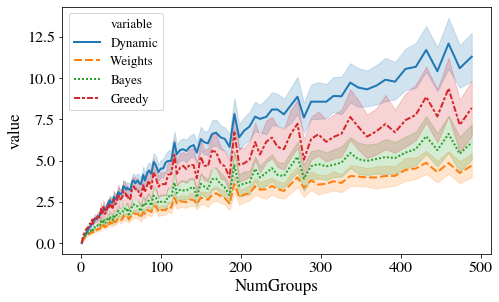

In [65]:
sns.lineplot(x='NumGroups', y='value', style='variable', hue = 'variable', data=df)

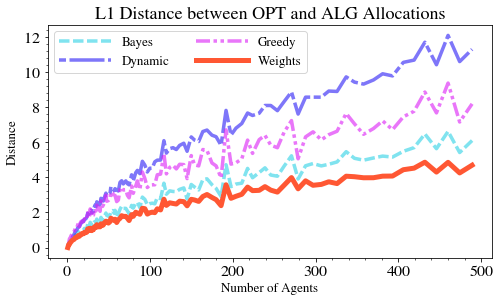

In [60]:
fileName = '../data/simple_distribution/L1.csv'
df = pd.read_csv(fileName)
std = df.groupby(['NumGroups', 'variable']).std().reset_index()
df = df.groupby(['NumGroups', 'variable']).mean().reset_index()
df = df.pivot(index='NumGroups',columns='variable',values = 'value')

plt.close('all')
fig, ax = plt.subplots()
for j,alg in enumerate(df.columns):
    if(alg=='Weights'):
        alphaVal = 1.
        linethick=5
        ax.plot(df[alg].index,
                    df[alg],
                    color=colorWheel[j%len(colorWheel)],
                    linestyle = '-',
                    lw=linethick,
                    label=alg,
                    alpha=alphaVal)
    elif alg!='Threshold':
        alphaVal = 0.6
        linethick = 3.5 
        ax.plot(df[alg].index,
                    df[alg],
                    color=colorWheel[j%len(colorWheel)],
                    linestyle = '-',
                    dashes=dashesStyles[j%len(dashesStyles)],
                    lw=linethick,
                    label=alg,
                    alpha=alphaVal)
ax.set_xlabel('Number of Agents',fontsize=13)
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.major.formatter._useMathText = True
ax.yaxis.set_minor_locator(  AutoMinorLocator(5))
ax.xaxis.set_minor_locator(  AutoMinorLocator(5))
# ax.yaxis.tick_right()
#ax.yaxis.set_label_coords(1.12,0.5)
ax.set_ylabel('Distance',fontsize=13)
nameOfPlot = 'L1 Distance between OPT and ALG Allocations'
plt.title(nameOfPlot,fontsize=18)
# plt.gca().set_ylim(top=1.5)
ax.legend(frameon=True, loc='upper left',ncol=2,handlelength=4)
plt.savefig(('LInf.pdf'),dpi=300)
plt.show()

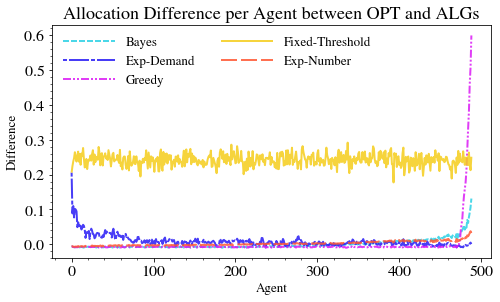

In [23]:
fileName = '../data/simple_distribution/GroupAllocationDifference.csv'
df = pd.read_csv(fileName)
df = df.groupby(['Group', 'variable']).mean().reset_index()
df = df.pivot(index='Group',columns='variable',values = 'value')
df = df.rename(columns = {'Threshold': 'Fixed-Threshold', 'Weights':'Exp-Number', 'Dynamic':'Exp-Demand'})
plt.close('all')
fig, ax = plt.subplots()
for j,alg in enumerate(df.columns):
    alphaVal = 0.85
    linethick = 2 
    ax.plot(df[alg].index,
                df[alg],
                color=colorWheel[j%len(colorWheel)],
                linestyle = '-',
                dashes=dashesStyles[j%len(dashesStyles)],
                lw=linethick,
                label=alg,
                alpha=alphaVal)
ax.set_xlabel('Group',fontsize=13)
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.major.formatter._useMathText = True
ax.yaxis.set_minor_locator(  AutoMinorLocator(5))
ax.xaxis.set_minor_locator(  AutoMinorLocator(5))
# ax.yaxis.tick_right()
#ax.yaxis.set_label_coords(1.12,0.5)
ax.set_ylabel('Difference',fontsize=13)
ax.set_xlabel('Agent')
nameOfPlot = 'Allocation Difference per Agent between OPT and ALGs'
plt.title(nameOfPlot,fontsize=18)
ax.legend(frameon=False, loc='upper left',ncol=2,handlelength=4)
plt.savefig(('GroupAllocationDifference.pdf'),dpi=300)
plt.show()

<AxesSubplot:xlabel='NumGroups', ylabel='value'>

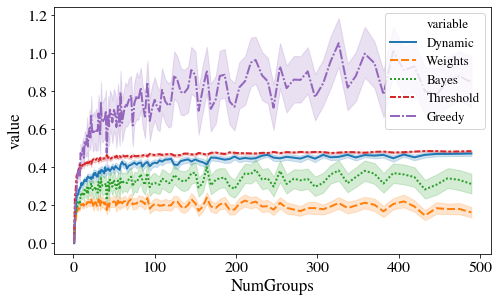

In [67]:
fileName = '../data/simple_distribution/L-Inf.csv'
df = pd.read_csv(fileName)
sns.lineplot(x='NumGroups', y='value', style='variable', hue = 'variable', data=df)

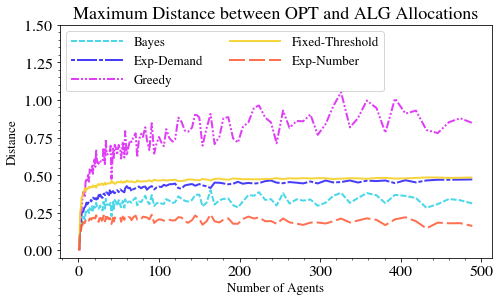

In [68]:
fileName = '../data/simple_distribution/L-Inf.csv'
df = pd.read_csv(fileName)
df = df.groupby(['NumGroups', 'variable']).mean().reset_index()
df = df.pivot(index='NumGroups',columns='variable',values = 'value')
df = df.rename(columns = {'Threshold': 'Fixed-Threshold', 'Weights':'Exp-Number', 'Dynamic':'Exp-Demand'})
plt.close('all')
fig, ax = plt.subplots()
for j,alg in enumerate(df.columns):
    alphaVal = 0.85
    linethick = 2 
    ax.plot(df[alg].index,
                df[alg],
                color=colorWheel[j%len(colorWheel)],
                linestyle = '-',
                dashes=dashesStyles[j%len(dashesStyles)],
                lw=linethick,
                label=alg,
                alpha=alphaVal)
ax.set_xlabel('Number of Agents',fontsize=13)
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.major.formatter._useMathText = True
ax.yaxis.set_minor_locator(  AutoMinorLocator(5))
ax.xaxis.set_minor_locator(  AutoMinorLocator(5))
# ax.yaxis.tick_right()
#ax.yaxis.set_label_coords(1.12,0.5)
ax.set_ylabel('Distance',fontsize=13)
nameOfPlot = 'Maximum Distance between OPT and ALG Allocations'
plt.title(nameOfPlot,fontsize=18)
plt.gca().set_ylim(top=1.5)
ax.legend(frameon=True, loc='upper left',ncol=2,handlelength=4)
plt.savefig(('LInf.pdf'),dpi=300)
plt.show()

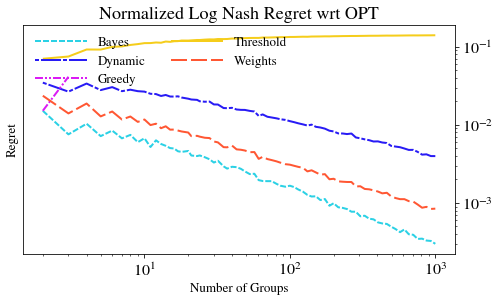

In [215]:
fileName = '../data/LogNashNormal.csv'
df = pd.read_csv(fileName)
df = df.groupby(['NumGroups', 'variable']).mean().reset_index()
df = df.pivot(index='NumGroups',columns='variable',values = 'value')
plt.close('all')
fig, ax = plt.subplots()
for j,alg in enumerate(df.columns):
    alphaVal = 1
    linethick = 2
    ax.plot(df[alg].index[1:],
                df[alg][1:],
                color=colorWheel[j%len(colorWheel)],
                linestyle = '-',
                dashes=dashesStyles[j%len(dashesStyles)],
                lw=linethick,
                label=alg,
                alpha=alphaVal)
ax.set_xlabel('Number of Agents',fontsize=13)
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.major.formatter._useMathText = True
ax.yaxis.set_minor_locator(  AutoMinorLocator(5))
ax.xaxis.set_minor_locator(  AutoMinorLocator(5))
ax.yaxis.tick_right()
ax.set_ylabel('Regret',fontsize=13)
nameOfPlot = 'Normalized Log Nash Regret wrt OPT'
plt.title(nameOfPlot,fontsize=18)
ax.legend(frameon=False, loc='upper left',ncol=2,handlelength=4)
plt.loglog()
plt.savefig(('NormalizedLogRegret.pdf'),dpi=300)
plt.show()

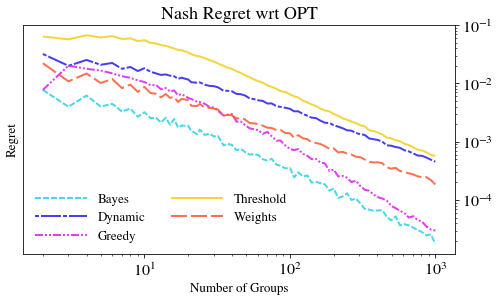

In [212]:
fileName = '../data/Nash.csv'
df = pd.read_csv(fileName)
df = df.groupby(['NumGroups', 'variable']).mean().reset_index()
df = df.pivot(index='NumGroups',columns='variable',values = 'value')
plt.close('all')
fig, ax = plt.subplots()
for j,alg in enumerate(df.columns):
    alphaVal = 0.85
    linethick = 2 
    ax.plot(df[alg].index[1:],
                df[alg][1:],
                color=colorWheel[j%len(colorWheel)],
                linestyle = '-',
                dashes=dashesStyles[j%len(dashesStyles)],
                lw=linethick,
                label=alg,
                alpha=alphaVal)
ax.set_xlabel('Number of Groups',fontsize=13)
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.major.formatter._useMathText = True
ax.yaxis.set_minor_locator(  AutoMinorLocator(5))
ax.xaxis.set_minor_locator(  AutoMinorLocator(5))
ax.yaxis.tick_right()
ax.set_ylabel('Regret',fontsize=13)
nameOfPlot = 'Nash Regret wrt OPT'
plt.title(nameOfPlot,fontsize=18)
ax.legend(frameon=False, loc='lower left',ncol=2,handlelength=4)
plt.loglog()
plt.savefig(('NashRegret.pdf'),dpi=300)
plt.show()

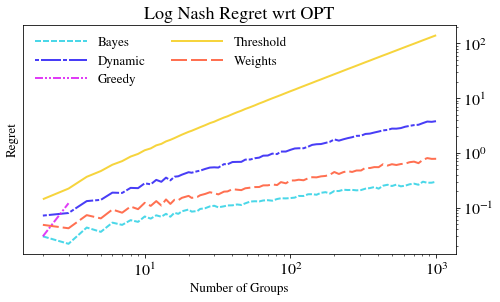

In [217]:
fileName = '../data/LogNash.csv'
df = pd.read_csv(fileName)
df = df.groupby(['NumGroups', 'variable']).mean().reset_index()
df = df.pivot(index='NumGroups',columns='variable',values = 'value')
plt.close('all')
fig, ax = plt.subplots()
for j,alg in enumerate(df.columns):
    alphaVal = 0.85
    linethick = 2 
    ax.plot(df[alg].index[1:],
                df[alg][1:],
                color=colorWheel[j%len(colorWheel)],
                linestyle = '-',
                dashes=dashesStyles[j%len(dashesStyles)],
                lw=linethick,
                label=alg,
                alpha=alphaVal)
ax.set_xlabel('Number of Groups',fontsize=13)
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.major.formatter._useMathText = True
ax.yaxis.set_minor_locator(  AutoMinorLocator(5))
ax.xaxis.set_minor_locator(  AutoMinorLocator(5))
ax.yaxis.tick_right()
ax.set_ylabel('Regret',fontsize=13)
nameOfPlot = 'Log Nash Regret wrt OPT'
plt.title(nameOfPlot,fontsize=18)
ax.legend(frameon=False, loc='upper left',ncol=2,handlelength=4)
plt.loglog()
plt.savefig(('LogRegret.pdf'),dpi=300)
plt.show()

In [12]:
fileName = '../data/GroupAllocationDifference.csv'
df = pd.read_csv(fileName)
#df = df.groupby(['Group', 'variable']).mean().reset_index()
#df = df.pivot(index='Group',columns='variable',values = 'value')
#df = df.rename(columns = {'Threshold': 'Fixed-Threshold', 'Weights':'Exp-Number', 'Dynamic':'Exp-Demand'})
df

,Unnamed: 0,Group,variable,value
0,0,0,Dynamic,0.237410
1,1,1,Dynamic,0.109596
2,2,2,Dynamic,0.113222
3,3,3,Dynamic,0.080481
4,4,4,Dynamic,0.074923
...,...,...,...,...
995,995,195,Greedy,0.255753
996,996,196,Greedy,0.338612
997,997,197,Greedy,0.434639
998,998,198,Greedy,0.562386
